# SMS Spam Collection Data Set

## Source: 

Tiago A. Almeida (talmeida ufscar.br)
Department of Computer Science
Federal University of Sao Carlos (UFSCar)
Sorocaba, Sao Paulo - Brazil

JosÃ© MarÃ­a GÃ³mez Hidalgo (jmgomezh yahoo.es)
R&D Department Optenet
Las Rozas, Madrid - Spain


## Data Set Information: 

This corpus has been collected from free or free for research sources at the Internet:

* A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].
* A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].
* A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].
* Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

1. GÃ³mez Hidalgo, J.M., Cajigas Bringas, G., Puertas Sanz, E., Carrero GarcÃ­a, F. Content Based SMS Spam Filtering. Proceedings of the 2006 ACM Symposium on Document Engineering (ACM DOCENG'06), Amsterdam, The Netherlands, 10-13, 2006.

2. Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Feature engineering for mobile (SMS) spam filtering. Proceedings of the 30th Annual international ACM Conference on Research and Development in information Retrieval (ACM SIGIR'07), New York, NY, 871-872, 2007.

3. Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Spam filtering for short messages. Proceedings of the 16th ACM Conference on Information and Knowledge Management (ACM CIKM'07). Lisbon, Portugal, 313-320, 2007.


## Attribute Information: 

The collection is composed by just one text file, where each line has the correct class followed by the raw message. We offer some examples bellow:

1. ham What you doing?how are you?
2. ham Ok lar... Joking wif u oni...
3. ham dun say so early hor... U c already then say...
4. ham MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H*
5. ham Siva is in hostel aha:-.
6. ham Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor.
7. spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop
8. spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B
8. spam URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU

Note: the messages are not chronologically sorted.


## Relevant Papers: 

We offer a comprehensive study of this corpus in the following paper. This work presents a number of statistics, studies and baseline results for several machine learning methods.

Almeida, T.A., GÃ³mez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.



# 1. Load the data 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv("SMSSpamCollection",  sep="\t", names=['target','message'])
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.columns

Index(['target', 'message'], dtype='object')

# 2. Exploratory Data Analysis 

In [10]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5572, 2)

In [8]:
df.describe()

,target,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
target     5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 43.6+ KB


In [7]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

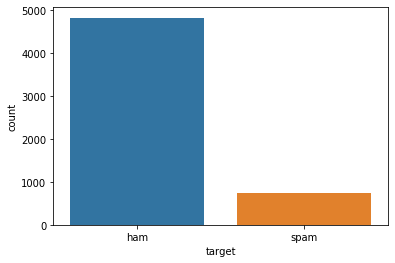

In [11]:
sns.countplot(x='target', data=df)

In [16]:
df['message'].value_counts()

Sorry, I'll call later                                                                                                                                                30
I cant pick the phone right now. Pls send a message                                                                                                                   12
Ok...                                                                                                                                                                 10
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!                    4
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..                               4
                                                                                                                                                           

In [112]:
df['sms_len'] = df['message'].apply(len)
df.head()

,target,message,clean_sms_stem,sms_length_stem,clean_sms_lema,sms_length_lema,sms_len
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16,111
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21,155
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7,61


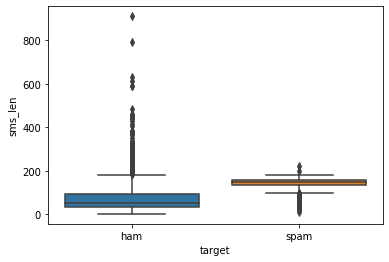

In [113]:
sns.boxplot(x='target',y='sms_len', data=df)

#### The message that have sms length is greater than equal to 790. The outlier are present.

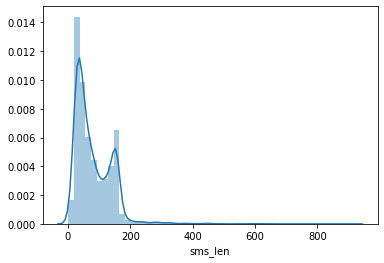

In [117]:
sns.distplot(df['sms_len'])

#### The length od sms is a positive skewed distribution. 

### Word Cloud for the ham sms

#### "pip install wordcloud" not working error

# 3. Data Preprocessing

In [37]:
 import nltk
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [81]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [82]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [83]:
## We can also use Lemmatizer instead of Stemmer

lemmatizer = WordNetLemmatizer()

In [84]:
# initializing the lists

clean_sms_lst = []

sms_len_lst = []

In [85]:
def preprocess(sms, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",sms)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_sms_lst.append(" ".join(words))
    
    sms_len_lst.append(len(words))

Stemming makes sure that different variations of a word, say ‘warm’, warmer’, ‘warming’ and ‘warmed,’ are represented by a single token - ‘warm’, because they all represent the same information (represented by the 'stem' of the word).

In [86]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

In [87]:
clean_sms_lst = []

sms_len_lst = []

df['message'].progress_apply(lambda x: preprocess(x, 'stem'))

df['clean_sms_stem'] = clean_sms_lst

df['sms_length_stem'] = sms_len_lst




  0%|                                                 | 0/5572 [00:00<?, ?it/s]


  0%|                                         | 8/5572 [00:00<01:13, 75.85it/s]


  0%|                                        | 14/5572 [00:00<01:20, 69.42it/s]


  0%|▏                                       | 22/5572 [00:00<01:17, 71.80it/s]


  1%|▏                                       | 29/5572 [00:00<01:23, 66.01it/s]


  1%|▏                                       | 34/5572 [00:00<01:33, 59.06it/s]


  1%|▎                                       | 41/5572 [00:00<01:34, 58.25it/s]


  1%|▎                                       | 50/5572 [00:00<01:26, 63.98it/s]


  1%|▍                                       | 57/5572 [00:00<01:36, 57.10it/s]


  1%|▍                                       | 67/5572 [00:01<01:26, 63.99it/s]


  1%|▌                                       | 76/5572 [00:01<01:18, 69.97it/s]


  2%|▌                                       | 87/5572 [00:01<01:10, 78.12it/s]


  2%|▋       

In [88]:
clean_sms_lst = []

sms_len_lst = []

df['message'].progress_apply(lambda x: preprocess(x, 'lemma'))

df['clean_sms_lema'] = clean_sms_lst

df['sms_length_lema'] = sms_len_lst




  0%|                                                 | 0/5572 [00:00<?, ?it/s]


  0%|                                         | 9/5572 [00:00<01:07, 82.29it/s]


  0%|                                        | 15/5572 [00:00<01:19, 69.61it/s]


  0%|▏                                       | 27/5572 [00:00<01:11, 77.15it/s]


  1%|▎                                       | 35/5572 [00:00<01:11, 77.19it/s]


  1%|▎                                       | 43/5572 [00:00<01:13, 75.09it/s]


  1%|▍                                       | 53/5572 [00:00<01:09, 79.53it/s]


  1%|▍                                       | 61/5572 [00:00<01:15, 72.95it/s]


  1%|▍                                       | 69/5572 [00:00<01:14, 73.79it/s]


  1%|▌                                       | 83/5572 [00:01<01:04, 85.44it/s]


  2%|▋                                       | 93/5572 [00:01<01:13, 74.42it/s]


  2%|▋                                      | 102/5572 [00:01<01:13, 74.03it/s]


  2%|▊       

In [89]:
df.head()

,target,message,clean_sms_stem,sms_length_stem,clean_sms_lema,sms_length_lema
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7


#  4. Data Preparation


In [90]:
# splitting into test and train

from sklearn.model_selection  import train_test_split

train, test = train_test_split(df,test_size=0.2,random_state=42)

In [91]:
train_clean_sms=[]
for sms in train['clean_sms_stem']:
    train_clean_sms.append(sms)

test_clean_sms=[]
for sms in test['clean_sms_stem']:
    test_clean_sms.append(sms)

### Text to numerical vector using Bag of Words

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word")

train_features = vectorizer.fit_transform(train_clean_sms)

test_features = vectorizer.transform(test_clean_sms)

In [93]:
vectorizer.vocabulary_

{'repli': 3969,
 'win': 5387,
 'weekli': 5323,
 'fifa': 1661,
 'world': 5452,
 'cup': 1082,
 'held': 2114,
 'send': 4196,
 'stop': 4586,
 'end': 1461,
 'servic': 4213,
 'hello': 2118,
 'sort': 4461,
 'town': 4980,
 'alreadi': 147,
 'dont': 1314,
 'rush': 4069,
 'home': 2171,
 'eat': 1403,
 'nacho': 3145,
 'let': 2680,
 'know': 2577,
 'eta': 1512,
 'come': 931,
 'guoyang': 2032,
 'go': 1930,
 'tell': 4784,
 'told': 4934,
 'hey': 2130,
 'sathya': 4122,
 'till': 4897,
 'dint': 1255,
 'meet': 2934,
 'even': 1523,
 'singl': 4330,
 'time': 4898,
 'saw': 4131,
 'situat': 4342,
 'orang': 3389,
 'bring': 619,
 'rington': 4019,
 'chart': 793,
 'hero': 2127,
 'free': 1779,
 'hit': 2144,
 'week': 5321,
 'pic': 3571,
 'wap': 5279,
 'receiv': 3911,
 'tip': 4900,
 'sit': 4337,
 'mu': 3107,
 'wait': 5261,
 'everyon': 1531,
 'get': 1890,
 'suit': 4652,
 'take': 4736,
 'shower': 4290,
 'finish': 1680,
 'liao': 2684,
 'urgent': 5146,
 'mobil': 3034,
 'award': 353,
 'bonu': 563,
 'caller': 702,
 'prize': 

In [94]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)

Total unique words: 5593
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (4457, 5593)


# 5. Train the Mode

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [105]:
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC()]

# 6. Evaluation

In [101]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

In [102]:
dense_features = train_features.toarray()

dense_test = test_features.toarray()

for classifier in tqdm(Classifiers):
    fit = classifier.fit(dense_features,train['target'])
    pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['target'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))




  0%|                                                    | 0/3 [00:00<?, ?it/s]

Accuracy of LogisticRegression is 0.9847533632286996





 33%|██████████████▋                             | 1/3 [00:00<00:01,  1.38it/s]

Accuracy of DecisionTreeClassifier is 0.9766816143497757





 67%|█████████████████████████████▎              | 2/3 [00:38<00:11, 11.77s/it]

Accuracy of SVC is 0.8663677130044843





100%|████████████████████████████████████████████| 3/3 [02:04<00:00, 41.59s/it]


In [109]:
dense_features = train_features.toarray()

dense_test = test_features.toarray()

for classifier in tqdm(Classifiers):
    fit = classifier.fit(dense_features,train['target'])
    pred = fit.predict(dense_test)
    matrix = confusion_matrix(pred,test['target'])
    print(' Confusion Matrix of '+classifier.__class__.__name__+' is '+str(matrix))




  0%|                                                    | 0/3 [00:00<?, ?it/s]

 Confusion Matrix of LogisticRegression is [[965  16]
 [  1 133]]





 33%|██████████████▋                             | 1/3 [00:00<00:01,  1.24it/s]

 Confusion Matrix of DecisionTreeClassifier is [[960  19]
 [  6 130]]





 67%|█████████████████████████████▎              | 2/3 [00:39<00:12, 12.19s/it]

 Confusion Matrix of SVC is [[966 149]
 [  0   0]]





100%|████████████████████████████████████████████| 3/3 [02:07<00:00, 42.43s/it]


In [107]:
dense_features = train_features.toarray()

dense_test = test_features.toarray()

for classifier in tqdm(Classifiers):
    fit = classifier.fit(dense_features,train['target'])
    pred = fit.predict(dense_test)
    report = classification_report(pred,test['target'])
    print('Report of '+classifier.__class__.__name__+' is '+str(report))




  0%|                                                    | 0/3 [00:00<?, ?it/s]

Report of LogisticRegression is               precision    recall  f1-score   support

         ham       1.00      0.98      0.99       981
        spam       0.89      0.99      0.94       134

    accuracy                           0.98      1115
   macro avg       0.95      0.99      0.97      1115
weighted avg       0.99      0.98      0.99      1115






 33%|██████████████▋                             | 1/3 [00:00<00:01,  1.21it/s]

Report of DecisionTreeClassifier is               precision    recall  f1-score   support

         ham       0.99      0.98      0.99       982
        spam       0.86      0.96      0.91       133

    accuracy                           0.98      1115
   macro avg       0.93      0.97      0.95      1115
weighted avg       0.98      0.98      0.98      1115






 67%|█████████████████████████████▎              | 2/3 [00:38<00:11, 11.79s/it]

Report of SVC is               precision    recall  f1-score   support

         ham       1.00      0.87      0.93      1115
        spam       0.00      0.00      0.00         0

    accuracy                           0.87      1115
   macro avg       0.50      0.43      0.46      1115
weighted avg       1.00      0.87      0.93      1115






100%|████████████████████████████████████████████| 3/3 [02:05<00:00, 41.75s/it]
